In [1]:
using Pkg
using LinearAlgebra, DelimitedFiles
using PyPlot, Plots, Seaborn
using ProgressMeter

using Random
using PyCall

using DataFrames
using QuadGK, Trapz
using Distributions, HypothesisTests
using Statistics, Bootstrap

pd = pyimport("pandas")

include("MCMC.jl")

mySampler4 (generic function with 1 method)

In [8]:
# Total Number of samles
N_samples = 70_000

# Prior ranges
p0 = P(0.1, 0.5)
p1 = P(0.02, 0.1)
p2 = P(0.5, 0.99)
p3 = P(0.4, 0.85)
p4 = P(0.5, 1.2)

# ==============================================================================================
# Data from FKP
data_k = [0.03547393, 0.04536227, 0.05529809, 0.06525727, 0.07522186, 0.08519572, 0.09517374,
          0.10515805, 0.11514517, 0.12513467, 0.13512515, 0.14511335, 0.15510591, 0.16508009][3:end-3]

data_err = [689742.32985944, 422349.15489652, 284398.67438859, 204294.43431579, 153791.07342702,
            119909.64840546,  96095.8944722 ,  78720.92218923, 65661.51329323,  55599.12279517,
            47683.41130658,  41346.44113022, 36191.52913155,  31950.89657434][3:end-3]

data = [1043601.75, 1021194.25,  575067.75,  244845.75,  210723.5 , 140282.25,  188820.75,  126491.75,
        181819.25,  155209.25, 90750.25,   46210.25,   71559.25,  102439.25][3:end-3];
# ==============================================================================================

mc_x0, mc_x1, mc_x2, mc_x3, mc_x4 = mySampler4(posterior,
                                               foldedNormalPDF,
                                               foldedNormalRV,
                                               p0, p1, p2, p3, p4, 
                                               data, data_err, data_k,
                                               N_samples);


Sampling...100%|████████████████████████████████████████| Time: 0:16:08


In [9]:
# 0.3, 0.049, 0.965, 0.7, 0.809
mean(mc_x0), mean(mc_x1), mean(mc_x2), mean(mc_x3), mean(mc_x4)

(0.28227948122387964, 0.08348200319596191, 0.8635388521874605, 0.5730792420234353, 0.610803064017582)

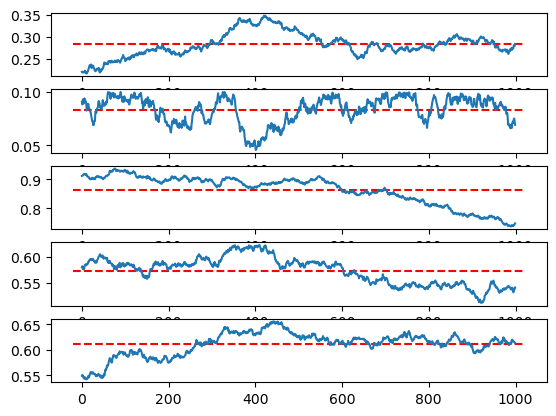

In [10]:
subplot(511)
PyPlot.plot(mc_x0)
PyPlot.hlines(mean(mc_x0), -20, length(mc_x0) + 20, color = "red", ls = "--")

subplot(512)
PyPlot.plot(mc_x1)
PyPlot.hlines(mean(mc_x1), -20, length(mc_x0) + 20, color = "red", ls = "--")

subplot(513)
PyPlot.plot(mc_x2)
PyPlot.hlines(mean(mc_x2), -20, length(mc_x0) + 20, color = "red", ls = "--");

subplot(514)
PyPlot.plot(mc_x3)
PyPlot.hlines(mean(mc_x3), -20, length(mc_x0) + 20, color = "red", ls = "--");

subplot(515)
PyPlot.plot(mc_x4)
PyPlot.hlines(mean(mc_x4), -20, length(mc_x4) + 20, color = "red", ls = "--");

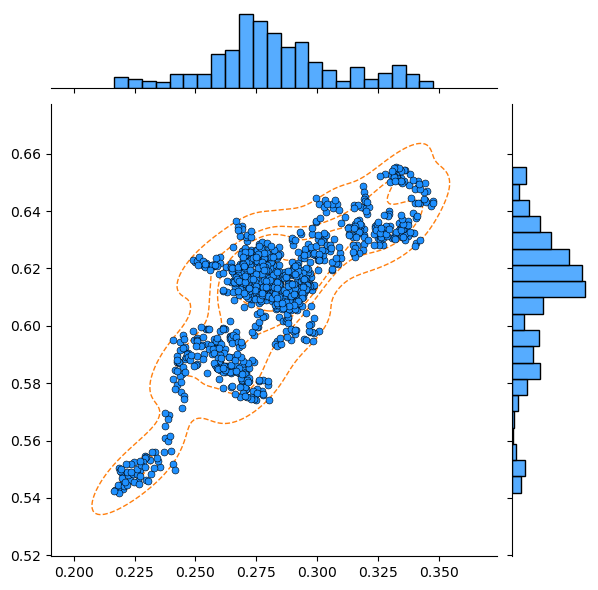

In [11]:
g = jointplot(mc_x0, mc_x4, s = 25,
              color = "dodgerblue", alpha = 1, edgecolor = "k")
g.plot_joint(kdeplot, color = "C1", zorder = 0, levels = 5, linestyles = "--", linewidths = 1.);

In [12]:
df = pd.DataFrame([mc_x0 mc_x1 mc_x2 mc_x3 mc_x4],
                   columns = ["Om0", "Ob0", "ns", "h", "s8"])

,Om0,Ob0,ns,h,s8
0,0.220323,0.090836,0.911230,0.579900,0.548780
1,0.218611,0.088442,0.911608,0.581597,0.550605
2,0.219459,0.092707,0.913959,0.576844,0.549120
3,0.219675,0.093312,0.914858,0.577431,0.547017
4,0.219126,0.089243,0.917648,0.575516,0.544437
...,...,...,...,...,...
995,0.273591,0.071054,0.738181,0.531370,0.616407
996,0.280434,0.074148,0.740973,0.533725,0.615913
997,0.279076,0.075158,0.742336,0.535931,0.615637
998,0.278859,0.072426,0.745094,0.540475,0.613529


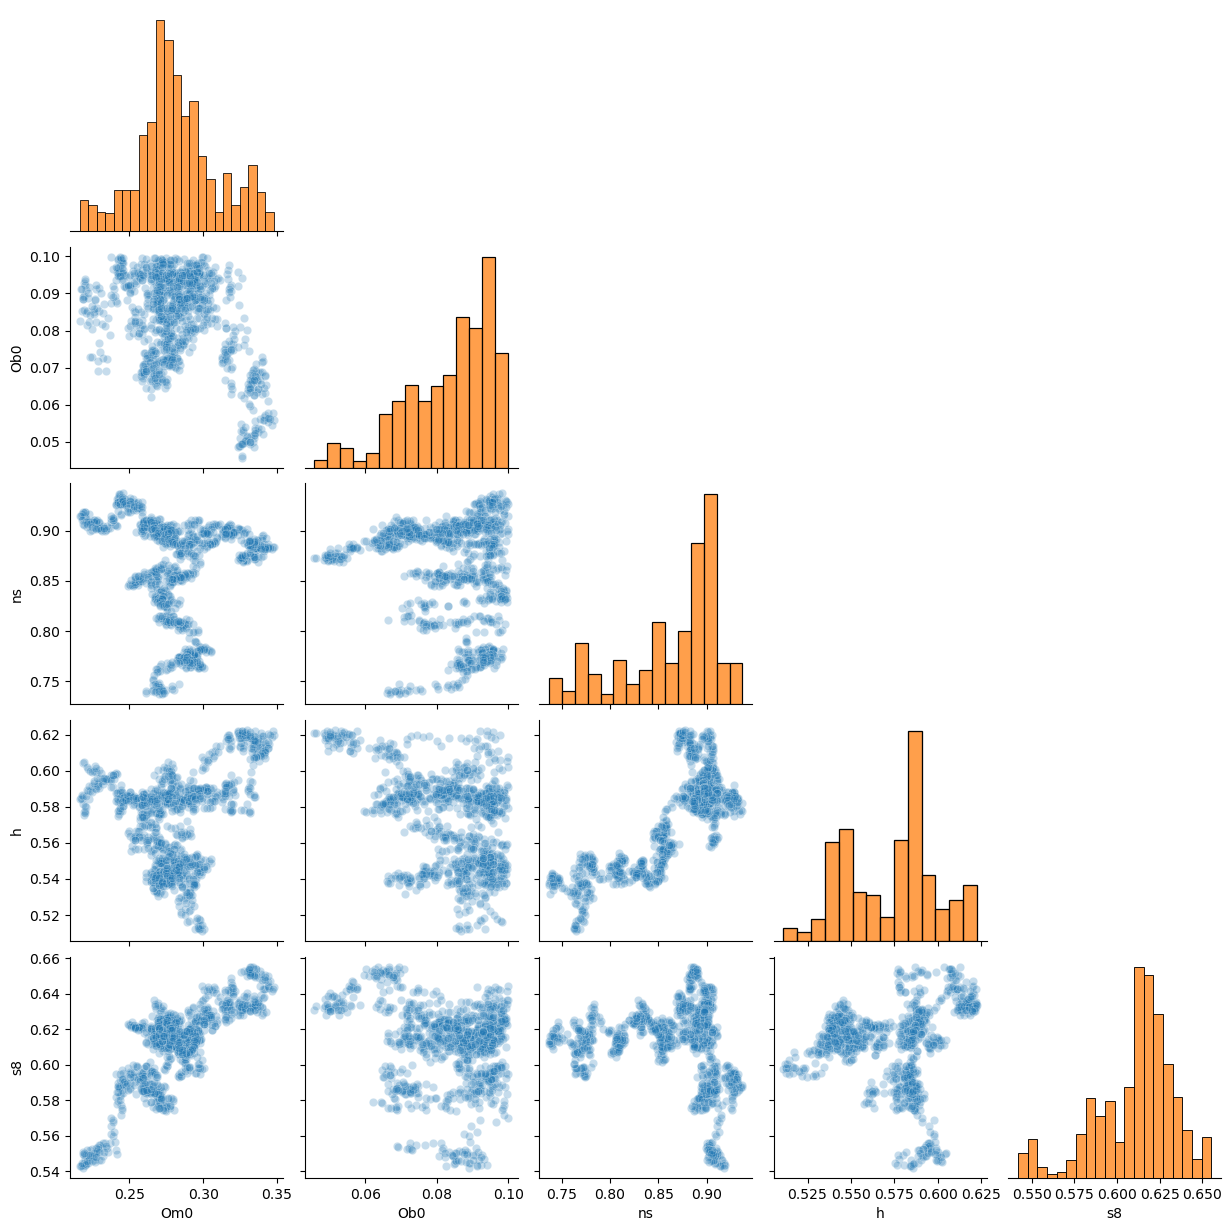

In [13]:
pairplot(df, markers = "o", corner = :True,
         plot_kws = Dict("color" => "C0", "alpha" => 0.25),
         diag_kws = Dict("color" => "C1"));  # "#82ad32"